In [1]:
import pandas as pd
import numpy as np
import statsmodels.tools.eval_measures as sm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# data pre-processing stack
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder ## research this - reads a string variable as a number 
from sklearn.compose import ColumnTransformer ## works alongside the above - keeps 'under the hood'.
from sklearn.impute import SimpleImputer

# machine learning stack
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# miscellaneous
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")

## <ins>Impute missing values<ins>

In order to deal with missing values in the car dataset, follow these steps:

**1.** Read the cleaned data you have already saved as part of the data cleaning challenge

**2.** Check data for null values.

**3.** Split the dataframe into training and test data

**4.** Use the appropriate strategy that you have learned during the encounter to impute missing values for both the train and test datasets separately

**<ins>Hint<ins>:** Drop the Market Category column as it contains too much of null values and also this feature doesn’t have high importance regarding the target feature which is the price

**5.** Combine the train and test data into one dataframe, then save the cleaned and imputed data for further analysis.

In [2]:
## 1. Read the cleaned data you have already saved as part of the data cleaning challenge

df = pd.read_csv('./data/cars_no_dupes.csv')

In [3]:
## 2. Check data for null values.

df.isnull().sum()

make               0
model              0
year               0
fuel               3
hp                69
cylinders         30
transmission       0
drive              0
doors              6
mrk_cat         3376
size               0
style              0
highway_mpg        0
city_mpg           0
popularity         0
price              0
dtype: int64

In [4]:
## 3. Split the dataframe into training and test data

# features
X = df[['make', 'model', 'year', 'fuel', 'hp', 'cylinders', 'transmission',
       'drive', 'doors', 'mrk_cat', 'size', 'style', 'highway_mpg', 'city_mpg',
       'popularity']]

# target
y = df['price']

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2,random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

print(df_train.shape)
print(df_test.shape)

(8959, 15) (2240, 15) (8959,) (2240,)
(8959, 16)
(2240, 16)


In [5]:
from sklearn.impute import SimpleImputer

In [6]:
## 4. Use the appropriate strategy that you have learned during the encounter to impute missing values... 
##... for both the train and test datasets separately

## Hint: Drop the Market Category column as it contains too much of null values and also this feature...
##... doesn’t have high importance regarding the target feature which is the price.

drop_column = 'mrk_cat'
X_train = X_train.drop(drop_column, axis=1)

X_train.isnull().sum()

make             0
model            0
year             0
fuel             2
hp              56
cylinders       25
transmission     0
drive            0
doors            5
size             0
style            0
highway_mpg      0
city_mpg         0
popularity       0
dtype: int64

In [7]:
X_test = X_test.drop(drop_column, axis=1)

X_test.isnull().sum()

make             0
model            0
year             0
fuel             1
hp              13
cylinders        5
transmission     0
drive            0
doors            1
size             0
style            0
highway_mpg      0
city_mpg         0
popularity       0
dtype: int64

In [8]:
X_train.shape

(8959, 14)

In [9]:
## viewing the fuel NaN's

X_train[X_train['fuel'].isnull()]

,make,model,year,fuel,hp,cylinders,transmission,drive,doors,size,style,highway_mpg,city_mpg,popularity
10620,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481
10622,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481


In [10]:
## find the most frequent fuel type, by make (using the 'top' column in the describe function)

X_train.groupby('make')['fuel'].describe(include='o')

,count,unique,top,freq
make,,,,
Acura,193,3,premium unleaded (recommended),105
Alfa Romeo,4,1,premium unleaded (required),4
Aston Martin,71,1,premium unleaded (required),71
Audi,270,5,premium unleaded (required),123
BMW,247,5,premium unleaded (required),205
Bentley,68,2,premium unleaded (required),46
Bugatti,1,1,premium unleaded (required),1
Buick,162,4,regular unleaded,105
Cadillac,301,5,regular unleaded,142


In [11]:
## save the 'top' column as a series

s = X_train.groupby('make')['fuel'].describe(include='o')['top']
type(s)

pandas.core.series.Series

In [12]:
## apply the series' value to the NaN values within X_train's fuel column

# left side is the X_train fuel column...
# (small 'x' means row!)
# when "x['fuel'] != x['fuel']" this means the fuel value is a NaN value...
#... as it's not a value and therefore equal to itself.
# "else x['fuel']"" replaces the x value with the s['fuel'] value (top)

X_train['fuel']=X_train.apply(lambda x: 
    s[x['make']] if x['fuel'] != x['fuel'] else x['fuel'],
    axis=1
)

## this is the transform process of the imputation! Can replace X_train with Y_train

In [13]:
X_test['fuel']=X_test.apply(lambda x: 
    s[x['make']] if x['fuel'] != x['fuel'] else x['fuel'],
    axis=1
)

In [14]:
## the below imputation is a safety-net for the above...
#... in case any 'makes' in the test set are not present in the 's' series 

imputer1 = SimpleImputer(strategy='most_frequent')

In [15]:
## fit the imputer to X_train

imputer1.fit(X_train[['fuel']])

SimpleImputer(strategy='most_frequent')

In [16]:
## transform the X_train

X_train['fuel'] = imputer1.transform(X_train[['fuel']])

In [17]:
## transform the X_test

X_test['fuel'] = imputer1.transform(X_test[['fuel']])

In [18]:
## set another imputer for 'doors' NaN values

imputer2 = SimpleImputer(strategy='most_frequent')

In [19]:
## fit to the X_train

imputer2.fit(X_train[['doors']])

SimpleImputer(strategy='most_frequent')

In [20]:
## transform the X_train

X_train['doors'] = imputer2.transform(X_train[['doors']])

In [21]:
## transform the X_test

X_test['doors'] = imputer2.transform(X_test[['doors']])

In [22]:
## set another imputer for 'cyliners' NaN values

imputer3 = SimpleImputer(strategy='mean')

In [23]:
## fit to the X_train

imputer3.fit(X_train[['cylinders']])

SimpleImputer()

In [24]:
## transform the X_train

X_train['cylinders'] = imputer3.transform(X_train[['cylinders']])

In [25]:
## transform the X_test

X_test['cylinders'] = imputer3.transform(X_test[['cylinders']])

In [26]:
## set another imputer for 'hp' NaN values

imputer4 = SimpleImputer(strategy='mean')

In [27]:
## fit to the X_train

imputer4.fit(X_train[['hp']])

SimpleImputer()

In [28]:
## transform the X_train

X_train['hp'] = imputer4.transform(X_train[['hp']])

In [29]:
## transform the X_test

X_test['hp'] = imputer4.transform(X_test[['hp']])

In [30]:
## do any null values renmain in the training set?

X_train.isna().sum()

make            0
model           0
year            0
fuel            0
hp              0
cylinders       0
transmission    0
drive           0
doors           0
size            0
style           0
highway_mpg     0
city_mpg        0
popularity      0
dtype: int64

In [31]:
## do any null values renmain in the testing set?

X_test.isna().sum()

make            0
model           0
year            0
fuel            0
hp              0
cylinders       0
transmission    0
drive           0
doors           0
size            0
style           0
highway_mpg     0
city_mpg        0
popularity      0
dtype: int64

In [32]:
## 5. Combine the train and test data into one dataframe, then save the cleaned and imputed data...
#...for further analysis.

y_train.head()

56       2000
5957    33810
4077    36900
476     41310
6253    58450
Name: price, dtype: int64

In [33]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,make,model,year,fuel,hp,cylinders,transmission,drive,doors,size,style,highway_mpg,city_mpg,popularity,price
56,Audi,200,1991,regular unleaded,217.0,5.0,MANUAL,all wheel drive,4.0,Midsize,Sedan,22,16,3105,2000
5957,Buick,LaCrosse,2016,flex-fuel (unleaded/E85),304.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,28,18,155,33810
4077,Infiniti,EX,2013,premium unleaded (recommended),325.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,4dr SUV,25,17,190,36900
476,Toyota,4Runner,2015,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,4.0,Midsize,4dr SUV,21,17,2031,41310
6253,Infiniti,M56,2011,premium unleaded (required),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,25,16,190,58450


In [34]:
df_test = pd.concat([X_test, y_test], axis=1)
df_test.head()

,make,model,year,fuel,hp,cylinders,transmission,drive,doors,size,style,highway_mpg,city_mpg,popularity,price
3532,Ford,E-Series Wagon,2012,flex-fuel (unleaded/E85),255.0,8.0,AUTOMATIC,rear wheel drive,3.0,Midsize,Passenger Van,15,11,5657,34160
2899,Honda,CR-V,2016,regular unleaded,185.0,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,31,25,2202,33395
3822,Suzuki,Equator,2012,regular unleaded,152.0,4.0,MANUAL,rear wheel drive,4.0,Compact,Extended Cab Pickup,23,19,481,19299
5846,Dodge,Journey,2015,regular unleaded,173.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,4dr SUV,26,19,1851,25195
9036,Chevrolet,Silverado 1500,2017,regular unleaded,355.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Crew Cab Pickup,22,15,1385,54925


In [35]:
imputed_df = pd.concat([df_train, df_test ], axis=0).reset_index(drop=True)
imputed_df

,make,model,year,fuel,hp,cylinders,transmission,drive,doors,size,style,highway_mpg,city_mpg,popularity,price
0,Audi,200,1991,regular unleaded,217.0,5.0,MANUAL,all wheel drive,4.0,Midsize,Sedan,22,16,3105,2000
1,Buick,LaCrosse,2016,flex-fuel (unleaded/E85),304.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,28,18,155,33810
2,Infiniti,EX,2013,premium unleaded (recommended),325.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,4dr SUV,25,17,190,36900
3,Toyota,4Runner,2015,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,4.0,Midsize,4dr SUV,21,17,2031,41310
4,Infiniti,M56,2011,premium unleaded (required),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,25,16,190,58450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,Chevrolet,Colorado,2015,regular unleaded,305.0,6.0,AUTOMATIC,rear wheel drive,4.0,Compact,Crew Cab Pickup,26,18,1385,30785
11195,Acura,RLX,2017,premium unleaded (recommended),310.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,20,204,54450
11196,Suzuki,XL7,2007,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,21,16,481,24599
11197,Ferrari,458 Italia,2013,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Convertible,17,13,2774,257412


In [36]:
imputed_df.to_csv('./data/cars_imputed.csv', index=False)

## Linear regression with categorical features

Use the following steps to encode categorical features and build a linear regression model with categorical and numerical features.

1. Subset the dataframe from the previous challenge to extract the categorical columns.

2. apply one-hot encoder to the categorical subset of the train dataset

3. Convert back the result object into pandas dataframe

4. Add numerical features to the encoded dataframe from the previous step

5. Repeat the above steps on the test dataset

6. Build a linear regression model using the encoded categorical and numerical features. Observe how R2 has changed from the last model you constructed using only numerical features.

7. Make predictions and plot predicted and actual values in one scatter plot.

In [37]:
df_train.head(2)

,make,model,year,fuel,hp,cylinders,transmission,drive,doors,size,style,highway_mpg,city_mpg,popularity,price
56,Audi,200,1991,regular unleaded,217.0,5.0,MANUAL,all wheel drive,4.0,Midsize,Sedan,22,16,3105,2000
5957,Buick,LaCrosse,2016,flex-fuel (unleaded/E85),304.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,28,18,155,33810


In [38]:
df_train.columns

Index(['make', 'model', 'year', 'fuel', 'hp', 'cylinders', 'transmission',
       'drive', 'doors', 'size', 'style', 'highway_mpg', 'city_mpg',
       'popularity', 'price'],
      dtype='object')

In [39]:
categorical_features = ['make','model','fuel','transmission','drive','size', 'style']

numerical_features = ['year', 'hp', 'cylinders', 'doors', 'highway_mpg', 'city_mpg', 'popularity']

## 1. Subset the dataframe from the previous challenge to extract the categorical columns.

In [40]:
X_train[categorical_features]

,make,model,fuel,transmission,drive,size,style
56,Audi,200,regular unleaded,MANUAL,all wheel drive,Midsize,Sedan
5957,Buick,LaCrosse,flex-fuel (unleaded/E85),AUTOMATIC,front wheel drive,Large,Sedan
4077,Infiniti,EX,premium unleaded (recommended),AUTOMATIC,rear wheel drive,Midsize,4dr SUV
476,Toyota,4Runner,regular unleaded,AUTOMATIC,four wheel drive,Midsize,4dr SUV
6253,Infiniti,M56,premium unleaded (required),AUTOMATIC,rear wheel drive,Large,Sedan
...,...,...,...,...,...,...,...
5734,Volkswagen,Jetta SportWagen,regular unleaded,AUTOMATIC,front wheel drive,Compact,Wagon
5191,Volkswagen,Golf SportWagen,regular unleaded,AUTOMATIC,front wheel drive,Compact,Wagon
5390,Volkswagen,GTI,premium unleaded (recommended),MANUAL,front wheel drive,Compact,2dr Hatchback
860,Saab,900,regular unleaded,MANUAL,front wheel drive,Compact,4dr Hatchback


## 2. apply one-hot encoder to the categorical subset of the train dataset

In [42]:
ohe = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')

In [43]:
ohe.fit(X_train[categorical_features])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [44]:
t = ohe.transform(X_train[categorical_features])
t

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
ohe.get_feature_names_out()

array(['make_Acura', 'make_Alfa Romeo', 'make_Aston Martin', 'make_Audi',
       'make_BMW', 'make_Bentley', 'make_Bugatti', 'make_Buick',
       'make_Cadillac', 'make_Chevrolet', 'make_Chrysler', 'make_Dodge',
       'make_FIAT', 'make_Ferrari', 'make_Ford', 'make_GMC',
       'make_Genesis', 'make_HUMMER', 'make_Honda', 'make_Hyundai',
       'make_Infiniti', 'make_Kia', 'make_Lamborghini', 'make_Land Rover',
       'make_Lexus', 'make_Lincoln', 'make_Lotus', 'make_Maserati',
       'make_Maybach', 'make_Mazda', 'make_McLaren', 'make_Mercedes-Benz',
       'make_Mitsubishi', 'make_Nissan', 'make_Oldsmobile',
       'make_Plymouth', 'make_Pontiac', 'make_Porsche',
       'make_Rolls-Royce', 'make_Saab', 'make_Scion', 'make_Spyker',
       'make_Subaru', 'make_Suzuki', 'make_Tesla', 'make_Toyota',
       'make_Volkswagen', 'make_Volvo', 'model_1 Series', 'model_100',
       'model_124 Spider', 'model_190-Class', 'model_2', 'model_2 Series',
       'model_200', 'model_200SX', 'model_24

## 3. Convert back the result object into pandas dataframe

In [46]:
X_train_ohe = pd.DataFrame(t, columns= ohe.get_feature_names_out())
X_train_ohe.head()

,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Bugatti,make_Buick,make_Cadillac,make_Chevrolet,...,style_Convertible,style_Convertible SUV,style_Coupe,style_Crew Cab Pickup,style_Extended Cab Pickup,style_Passenger Minivan,style_Passenger Van,style_Regular Cab Pickup,style_Sedan,style_Wagon
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [149]:
X_train.head()

,make,model,year,fuel,hp,cylinders,transmission,drive,doors,size,style,highway_mpg,city_mpg,popularity
56,Audi,200,1991,regular unleaded,217.0,5.0,MANUAL,all wheel drive,4.0,Midsize,Sedan,22,16,3105
5957,Buick,LaCrosse,2016,flex-fuel (unleaded/E85),304.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,28,18,155
4077,Infiniti,EX,2013,premium unleaded (recommended),325.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,4dr SUV,25,17,190
476,Toyota,4Runner,2015,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,4.0,Midsize,4dr SUV,21,17,2031
6253,Infiniti,M56,2011,premium unleaded (required),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,25,16,190


## 4. Add numerical features to the encoded dataframe from the previous step

In [148]:
X_train_concat = pd.concat([X_train_ohe, X_train[numerical_features].reset_index(drop=True)], axis=1)
X_train_concat

(8959, 990)

## 5. Repeat the above steps on the test dataset

In [50]:
tst_ohe = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')

In [51]:
tst_ohe.fit(X_test[categorical_features])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [52]:
tst_array = tst_ohe.transform(X_test[categorical_features])
tst_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [53]:
tst_ohe.get_feature_names_out()

array(['make_Acura', 'make_Alfa Romeo', 'make_Aston Martin', 'make_Audi',
       'make_BMW', 'make_Bentley', 'make_Bugatti', 'make_Buick',
       'make_Cadillac', 'make_Chevrolet', 'make_Chrysler', 'make_Dodge',
       'make_FIAT', 'make_Ferrari', 'make_Ford', 'make_GMC',
       'make_HUMMER', 'make_Honda', 'make_Hyundai', 'make_Infiniti',
       'make_Kia', 'make_Lamborghini', 'make_Land Rover', 'make_Lexus',
       'make_Lincoln', 'make_Lotus', 'make_Maserati', 'make_Maybach',
       'make_Mazda', 'make_McLaren', 'make_Mercedes-Benz',
       'make_Mitsubishi', 'make_Nissan', 'make_Oldsmobile',
       'make_Plymouth', 'make_Pontiac', 'make_Porsche',
       'make_Rolls-Royce', 'make_Saab', 'make_Scion', 'make_Subaru',
       'make_Suzuki', 'make_Tesla', 'make_Toyota', 'make_Volkswagen',
       'make_Volvo', 'model_1 Series', 'model_1 Series M', 'model_100',
       'model_124 Spider', 'model_190-Class', 'model_2', 'model_2 Series',
       'model_200', 'model_240', 'model_240SX', 'model_

In [54]:
X_test_ohe = pd.DataFrame(tst_array, columns= tst_ohe.get_feature_names_out())
X_test_ohe.head()

,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Bugatti,make_Buick,make_Cadillac,make_Chevrolet,...,style_Convertible,style_Convertible SUV,style_Coupe,style_Crew Cab Pickup,style_Extended Cab Pickup,style_Passenger Minivan,style_Passenger Van,style_Regular Cab Pickup,style_Sedan,style_Wagon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
X_test.shape

(2240, 14)

In [56]:
X_test_concat = pd.concat([X_test_ohe, X_test[numerical_features].reset_index(drop=True)], axis=1)
X_test_concat

,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Bugatti,make_Buick,make_Cadillac,make_Chevrolet,...,style_Regular Cab Pickup,style_Sedan,style_Wagon,year,hp,cylinders,doors,highway_mpg,city_mpg,popularity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2012,255.0,8.0,3.0,15,11,5657
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2016,185.0,4.0,4.0,31,25,2202
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2012,152.0,4.0,4.0,23,19,481
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2015,173.0,4.0,4.0,26,19,1851
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2017,355.0,8.0,4.0,22,15,1385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2015,305.0,6.0,4.0,26,18,1385
2236,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2017,310.0,6.0,4.0,30,20,204
2237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2007,252.0,6.0,4.0,21,16,481
2238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2013,562.0,8.0,2.0,17,13,2774


## 6. Build a linear regression model using the encoded categorical and numerical features.  Observe how R2 has changed from the last model you constructed using only numerical features.


In [69]:
transformer = ColumnTransformer([
    ('scaling', MinMaxScaler(), numerical_features),
    ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'), categorical_features)
])

In [70]:
# pipeline
pipeline = make_pipeline(transformer, LinearRegression())

In [60]:
# X_train = X_train_concat 

In [61]:
# X_train

In [71]:
# model training
pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  ['year', 'hp', 'cylinders',
                                                   'doors', 'highway_mpg',
                                                   'city_mpg', 'popularity']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['make', 'model', 'fuel',
                                                   'transmission', 'drive',
                                                   'size', 'style'])])),
                ('linearregression', LinearRegression())])

In [72]:
# training score
training_score = pipeline.score(X_train,y_train)
print(f'training score: {round(training_score,6)}')

training score: 0.98958


In [74]:
# test score
test_score = pipeline.score(X_test,y_test)
print(f'test score: {round(test_score,6)}')

test score: 0.964178


### 7. Make predictions and plot predicted and actual values in one scatter plot.

In [135]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'), categorical_features)
])

In [136]:
# pipeline
pipeline = make_pipeline(transformer, LinearRegression())

In [60]:
# X_train = X_train_concat 

In [61]:
# X_train

In [137]:
# model training
pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['make', 'model', 'fuel',
                                                   'transmission', 'drive',
                                                   'size', 'style'])])),
                ('linearregression', LinearRegression())])

In [139]:
# model training
pipeline.fit(X_test,y_test)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['make', 'model', 'fuel',
                                                   'transmission', 'drive',
                                                   'size', 'style'])])),
                ('linearregression', LinearRegression())])

In [138]:
# training score
training_score = pipeline.score(X_train,y_train)
print(f'training score: {round(training_score,6)}')

training score: 0.984867


In [140]:
# test score
test_score = pipeline.score(X_test,y_test)
print(f'test score: {round(test_score,6)}')

test score: 0.976502


In [142]:
pred_price = pipeline.predict(X_train)
type(pred_price)

numpy.ndarray

In [143]:
type(y_train)

pandas.core.series.Series

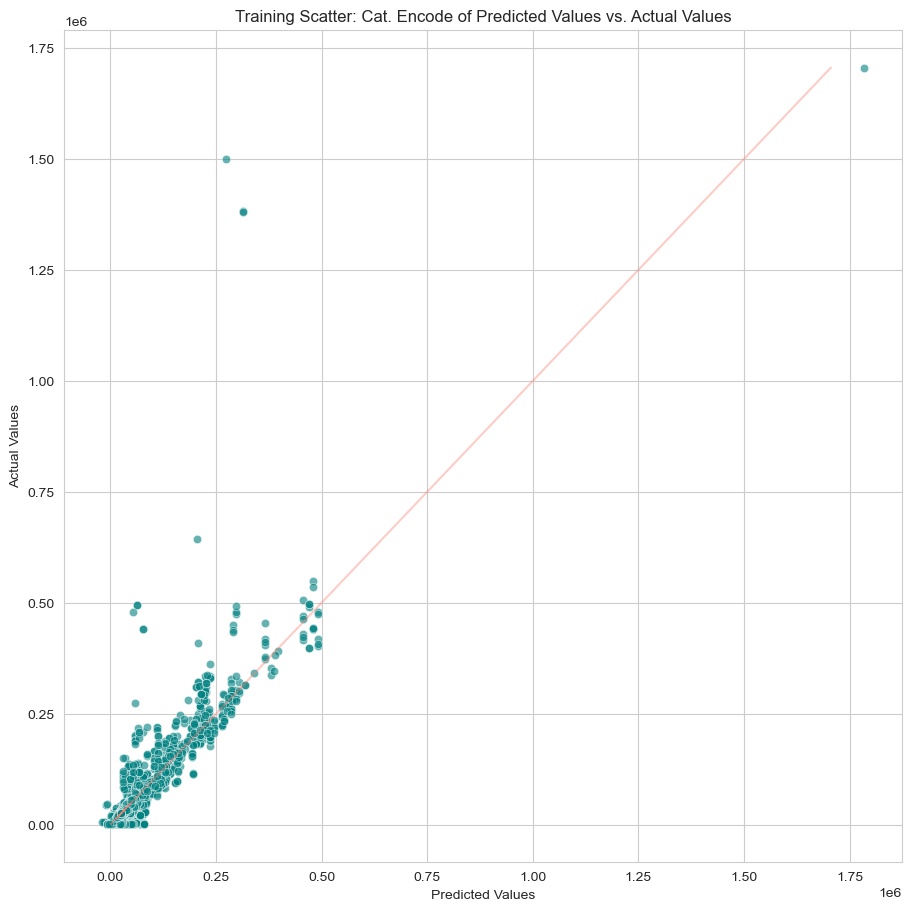

In [150]:
plt.figure(figsize=(9,9),layout='constrained')
sns.scatterplot(x = pred_price, y = y_train, color = 'teal', alpha = 0.6)
sns.lineplot(x = y_train, y = y_train, color = 'salmon', alpha = 0.4)

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Training Scatter: Cat. Encode of Predicted Values vs. Actual Values');

plt.savefig('./training_scatter_cat_encode')

In [151]:
test_pred_price = pipeline.predict(X_test)

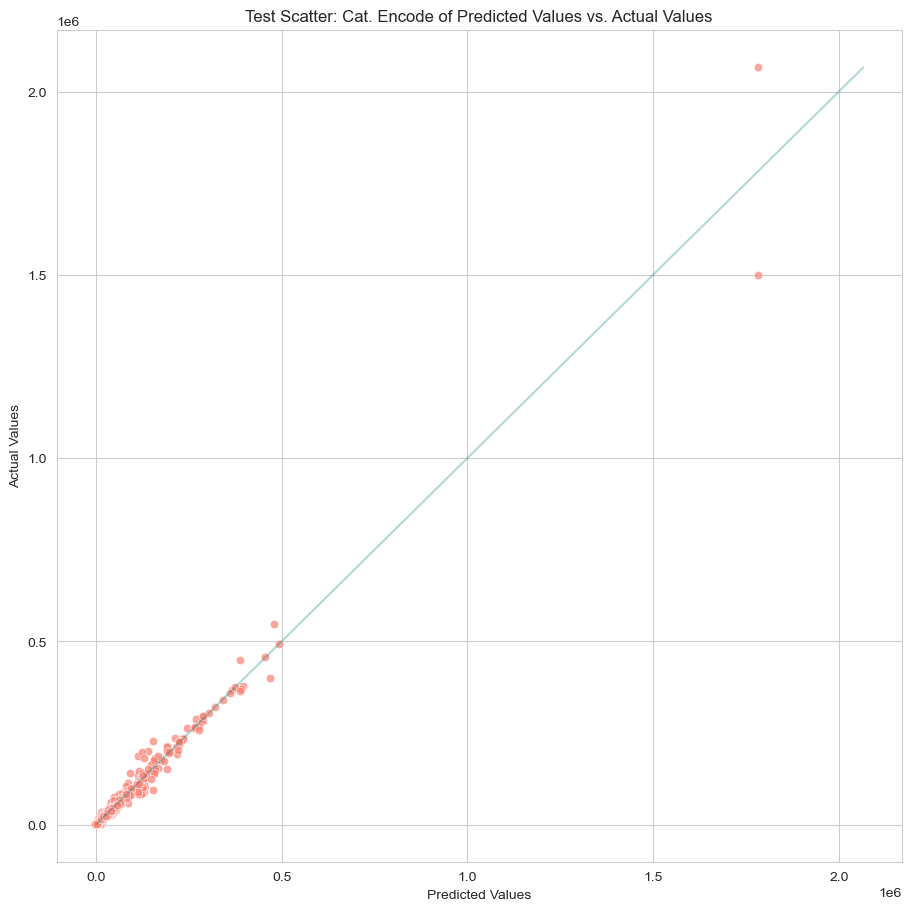

In [152]:
plt.figure(figsize=(9,9),layout='constrained')
sns.scatterplot(x = test_pred_price, y = y_test, color = 'salmon', alpha = 0.7)
sns.lineplot(x = y_test, y = y_test, color = 'teal', alpha = 0.3)

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Test Scatter: Cat. Encode of Predicted Values vs. Actual Values');

plt.savefig('./test_scatter_cat_encode')